#  preprocessing

In [97]:
import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 


name='ehresp_2014.csv'
K=7

df=pd.read_csv(name)
df=df.drop('eeincome1', axis=1)
df=df.drop('euincome2', axis=1)
df=df.drop('exincome1', axis=1)

df=df[df["erincome"] > 0]

id_data=np.array(df['tucaseid'])
income_data=np.array(df['erincome'])

tmp_df=df.drop('tucaseid',axis=1)
tmp_df=tmp_df.drop('erincome',axis=1)
variable_data=np.array(tmp_df)

tmp_mean=np.mean(variable_data,axis=0)
tmp_sd=np.std(variable_data,axis=0)

variable_data=(variable_data-tmp_mean)/(tmp_sd+0.00001)


# initialization

In [98]:
val=np.shape(variable_data)[1]
num=np.shape(income_data)[0]
cluster_id=np.zeros(num)
slope=np.zeros([val,K])
#intercept=np.zeros([val,K])
for i in range(num):
	cluster_id[i]=(i+K-3)%K

# define functions

In [99]:
def update(slope):
	for k in range(K):
		target_list=list()
		for i in range(1,6):
			target_list.append(list(np.where((cluster_id==k) & (income_data==i))[0]))
		for i in range(val):

			num=0
			tmp=0
			for j in range(5):
				for l in range(len(target_list[j])):
					if cluster_id[target_list[j][l]]==k:
						num+=(j+1)
						tmp+=variable_data[target_list[j][l],i]
			if num>0:
				slope[i,k]=tmp/float(num)
	return [slope]


def allocation(cluster_id,slope,K):
	for l in range(cluster_id.shape[0]):
		income=income_data[l]
		tmp_attribute=np.zeros([val,K])
		for k in range(K):
			tmp_attribute[:,k]=income*slope[:,k]
		dist=np.zeros(K)
		tmp=variable_data[l,:]
		for k in range(K):
			dist[k]=np.sum(np.power(tmp.transpose()-tmp_attribute[:,k],2))
		cluster_id[l]=np.argmin(dist)
	return cluster_id

def total_loss(cluster_id,income_data,variable_data):
	loss_sum=0
	for l in range(int(cluster_id.shape[0])):
		income=income_data[l]
		tmp=variable_data[l,:]
		cluster=int(cluster_id[l])
		tmp_attribute=income*slope[:,cluster]
		loss_sum+=np.sum(np.power(tmp.transpose()-tmp_attribute,2))
	return loss_sum

# clustering

In [100]:
Epoch=50
loss=np.zeros([Epoch])

for epoch in range(Epoch):
	[slope]=update(slope)
	cluster_id=allocation(cluster_id,slope,K)
	tmp_loss=total_loss(cluster_id,income_data,variable_data)
	loss[epoch]=tmp_loss




# Train error varying the number of epoch

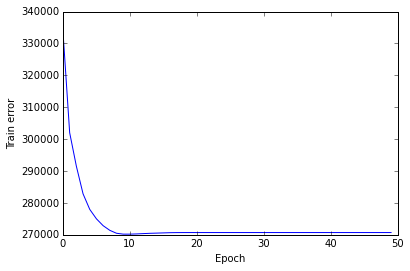

In [101]:
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Train error")


In [102]:
clustering_summary=np.zeros([K,5])
for i in range(num):
    clustering_summary[int(cluster_id[i]),int(income_data[i]-1)]+=1
clustering_summary=pd.DataFrame(clustering_summary,columns=list('12345'))

# row: clustering ID column: income level

In [103]:
clustering_summary

,1,2,3,4,5
0,96,2,7,2,0
1,649,193,307,10,705
2,292,0,0,0,0
3,1926,9,0,0,0
4,1946,53,3,0,0
5,1155,43,0,0,0
6,926,233,659,24,1692


# visualization

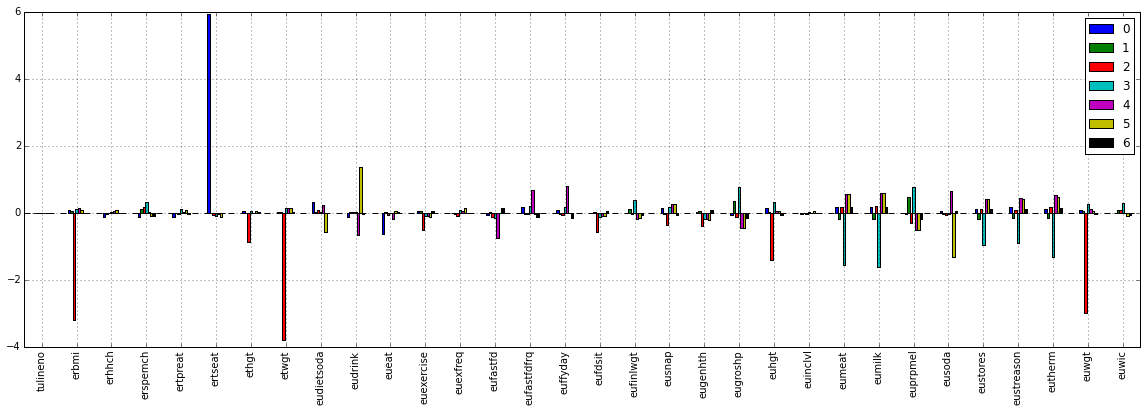

In [104]:
i=0
tmp=slope#.reshape(val)
tmp_slope_df=pd.DataFrame(tmp,index=tmp_df.columns)#,
tmp_slope_df.plot(kind='bar',figsize=(20, 6))

In [105]:
tmp_df.columns

Index([u'tulineno', u'erbmi', u'erhhch', u'erspemch', u'ertpreat', u'ertseat', u'ethgt', u'etwgt', u'eudietsoda', u'eudrink', u'eueat', u'euexercise', u'euexfreq', u'eufastfd', u'eufastfdfrq', u'euffyday', u'eufdsit', u'eufinlwgt', u'eusnap', u'eugenhth', u'eugroshp', u'euhgt', u'euinclvl', u'eumeat', u'eumilk', u'euprpmel', u'eusoda', u'eustores', u'eustreason', u'eutherm', u'euwgt', u'euwic'], dtype='object')

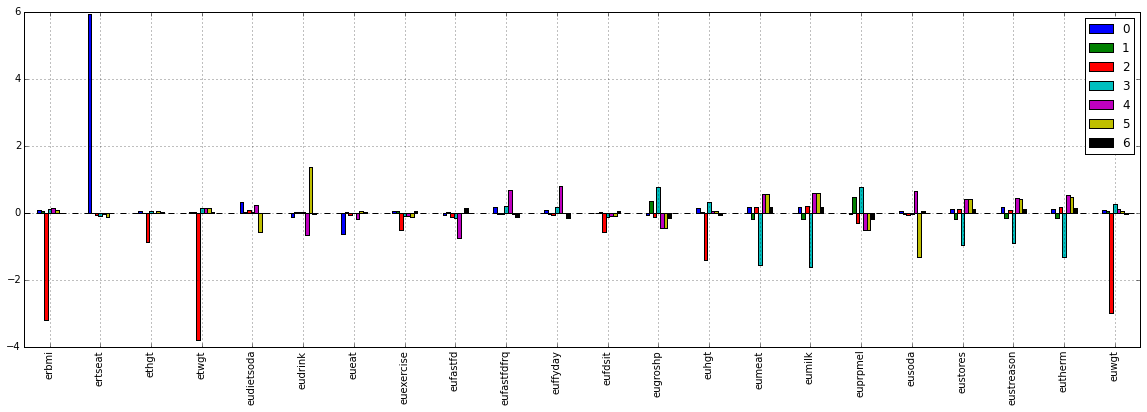

In [106]:
limited_tmp=tmp_slope_df
limited_tmp=limited_tmp.drop("tulineno",axis=0)
limited_tmp=limited_tmp.drop("erspemch",axis=0)
limited_tmp=limited_tmp.drop("eugenhth",axis=0)
limited_tmp=limited_tmp.drop("eusnap",axis=0)
limited_tmp=limited_tmp.drop("eufinlwgt",axis=0)
#limited_tmp=limited_tmp.drop("",axis=0)
limited_tmp=limited_tmp.drop("erhhch",axis=0)
limited_tmp=limited_tmp.drop("ertpreat",axis=0)
limited_tmp=limited_tmp.drop("euexfreq",axis=0)
limited_tmp=limited_tmp.drop("euinclvl",axis=0)
limited_tmp=limited_tmp.drop("euwic",axis=0)
limited_tmp.plot(kind='bar',figsize=(20, 6))

In [107]:
limited_tmp

,0,1,2,3,4,5,6
erbmi,0.067960,0.040123,-3.211381,0.099155,0.150369,0.093887,0.007401
ertseat,5.932530,-0.017028,-0.067643,-0.088076,-0.040609,-0.122594,-0.020502
ethgt,0.041877,0.001898,-0.877601,0.038069,0.004834,0.047820,0.008140
etwgt,0.026366,0.032657,-3.796045,0.146757,0.149797,0.152910,0.011820
eudietsoda,0.306459,0.011759,0.086807,0.022422,0.237180,-0.572341,0.004030
eudrink,-0.124646,0.021497,0.023025,0.021400,-0.660069,1.356847,-0.039780
eueat,-0.638745,0.027125,-0.076920,-0.017428,-0.193561,0.061981,0.026079
euexercise,0.064703,0.040215,-0.515937,-0.097746,-0.107288,-0.129560,0.041275
eufastfd,-0.079564,0.033613,-0.126473,-0.161072,-0.764377,0.001504,0.146604
eufastfdfrq,0.159244,-0.032144,-0.049374,0.194872,0.691856,-0.028911,-0.133964
